In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from Yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data for all stocks in one call (more efficient)
stock_data = yf.download(tech_list, start=start, end=end, group_by="ticker")

# Create a dictionary to store data per company
company_data = {}
company_names = {"AAPL": "APPLE", "GOOG": "GOOGLE", "MSFT": "MICROSOFT", "AMZN": "AMAZON"}

for stock in tech_list:
    company_data[stock] = stock_data[stock].copy()  # Extract individual stock data
    company_data[stock]["company_name"] = company_names[stock]

# Concatenate all stock data
df = pd.concat(company_data.values(), axis=0)

# Display the last 10 rows
print(df.tail(10))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed

Price             Open        High         Low       Close    Volume  \
Date                                                                   
2025-02-03  234.059998  239.250000  232.899994  237.419998  37285900   
2025-02-04  239.009995  242.520004  238.029999  242.059998  29713800   
2025-02-05  237.020004  238.320007  235.199997  236.169998  38727300   
2025-02-06  238.009995  239.660004  236.009995  238.830002  60897100   
2025-02-07  232.500000  234.809998  228.059998  229.149994  77539300   
2025-02-10  230.550003  233.919998  229.199997  233.139999  35419900   
2025-02-11  231.919998  233.440002  230.130005  232.759995  23713700   
2025-02-12  230.460007  231.179993  228.160004  228.929993  32285200   
2025-02-13  228.850006  230.419998  227.520004  230.369995  31346500   
2025-02-14  229.199997  229.889999  227.229996  228.679993  26973200   

Price      company_name  
Date                     
2025-02-03       AMAZON  
2025-02-04       AMAZON  
2025-02-05       AMAZON  
2025-

In [2]:
AAPL = company_data['AAPL']

In [3]:
AAPL.describe()

Price        Open        High         Low       Close        Volume
count  249.000000  249.000000  249.000000  249.000000  2.490000e+02
mean   212.286585  214.423832  210.409743  212.554378  5.692713e+07
std     25.756693   26.034031   25.471157   25.924349  3.130313e+07
min    164.572913  165.617978  163.308889  164.224564  2.323470e+07
25%    188.695822  190.170847  187.410124  189.204102  4.083810e+07
50%    223.249686  224.855115  220.684285  222.280777  4.953780e+07
75%    229.534821  232.299271  227.908415  229.727417  6.263130e+07
max    257.906429  259.814335  257.347047  258.735504  3.186799e+08

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-02-20 to 2025-02-14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          249 non-null    float64
 1   High          249 non-null    float64
 2   Low           249 non-null    float64
 3   Close         249 non-null    float64
 4   Volume        249 non-null    int64  
 5   company_name  249 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


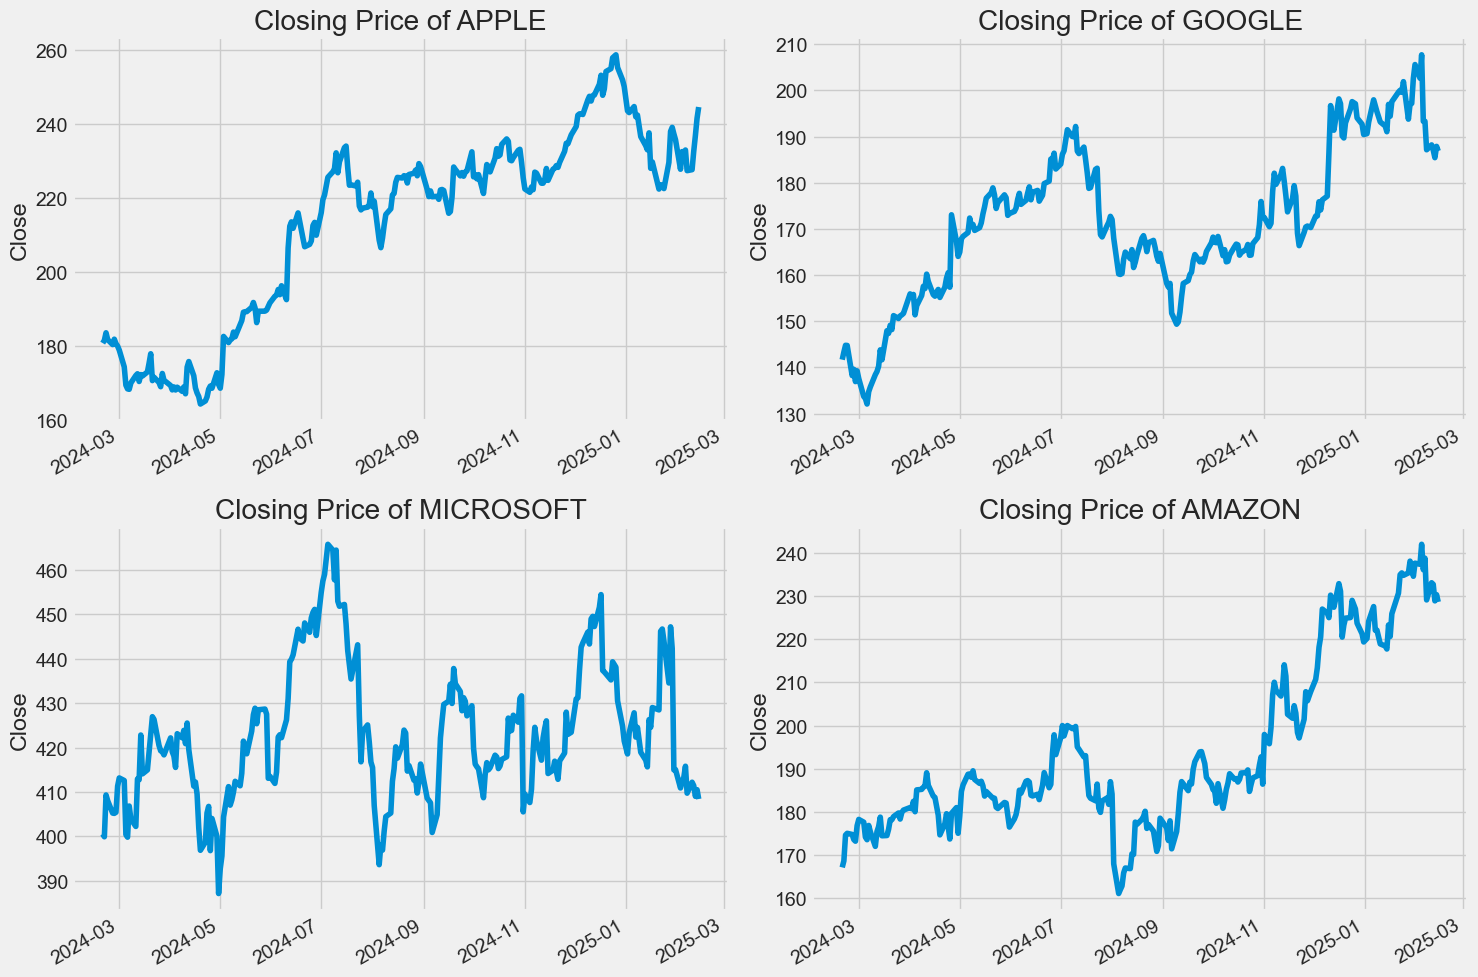

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, company) in enumerate(company_data.items(), 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[ticker]}")
    
plt.tight_layout()

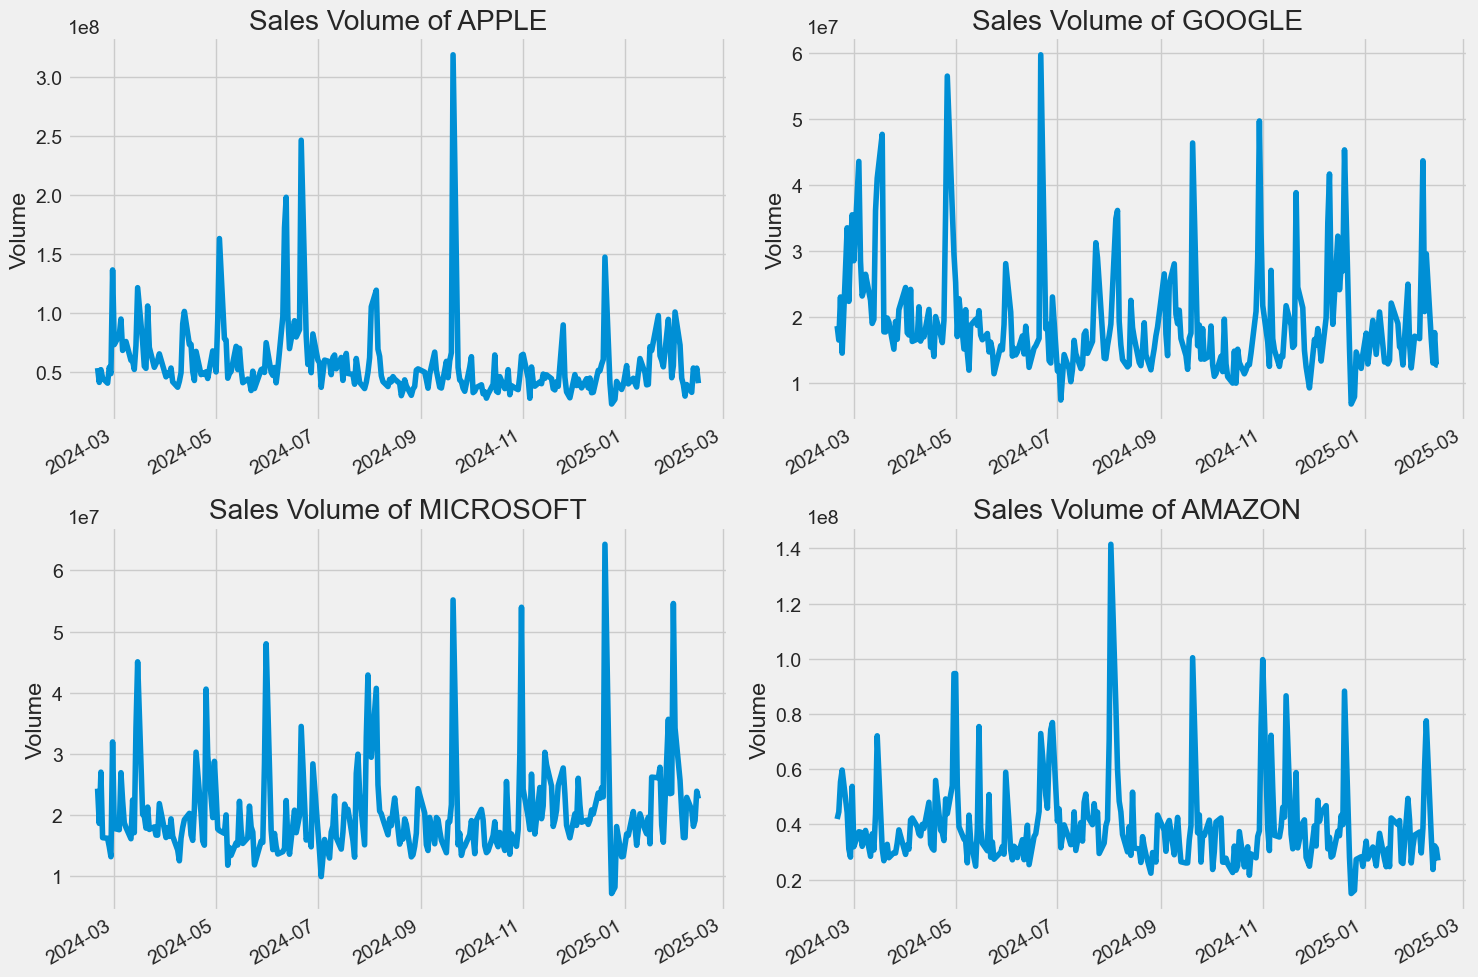

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, company) in enumerate(company_data.items(), 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {company_names[ticker]}")
    
plt.tight_layout()

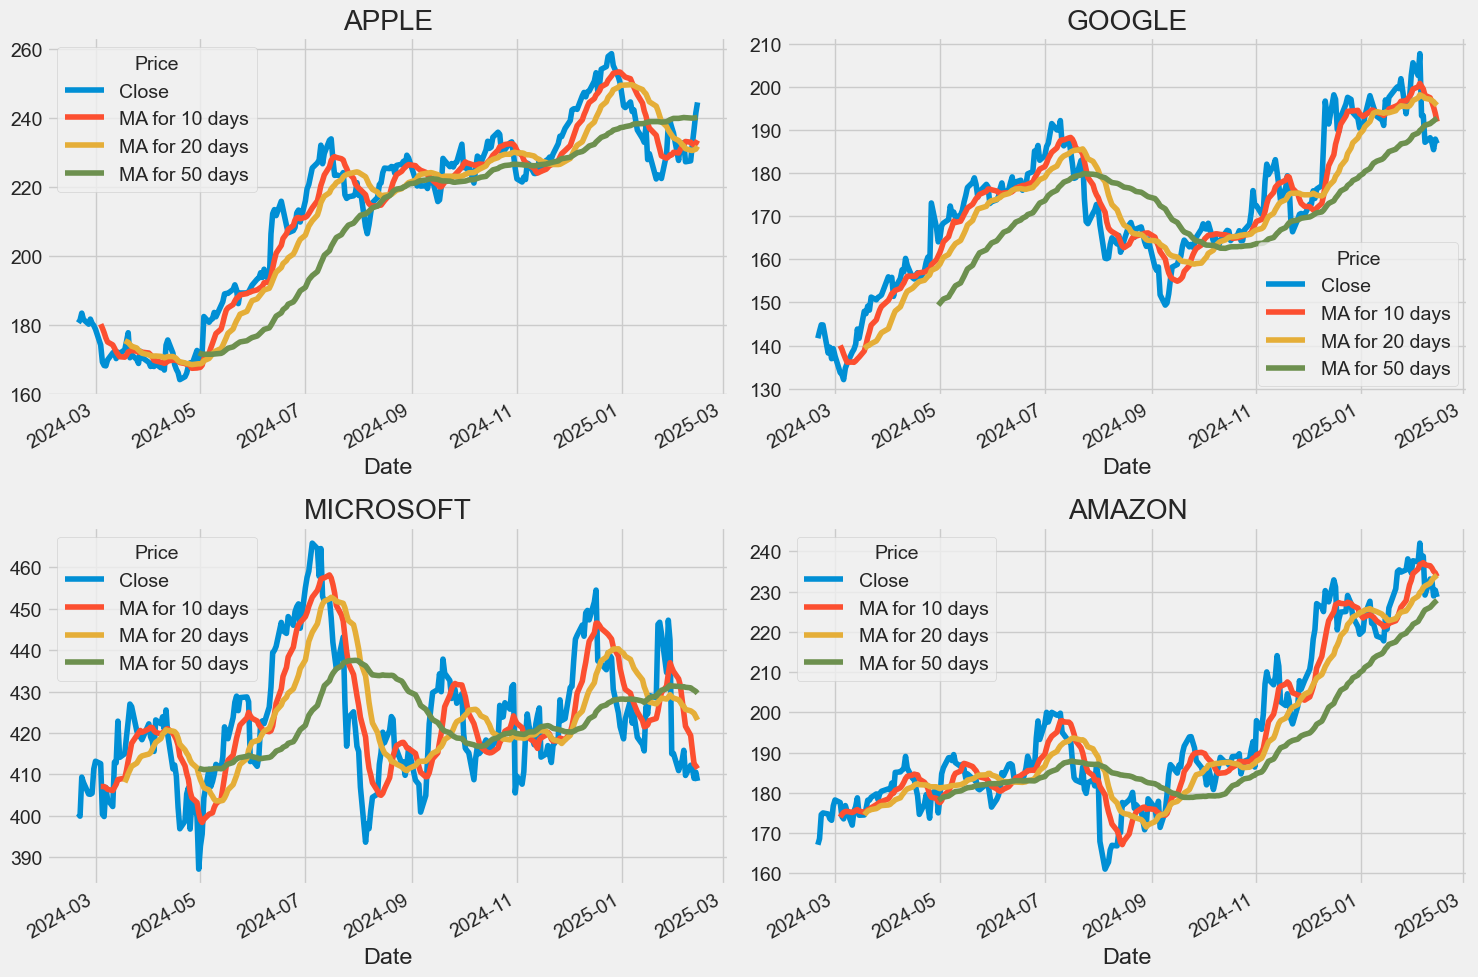

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_data:
        column_name = f"MA for {ma} days"
        company_data[company][column_name] = company_data[company]['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_data['GOOG'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_data['MSFT'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

company_data['AMZN'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


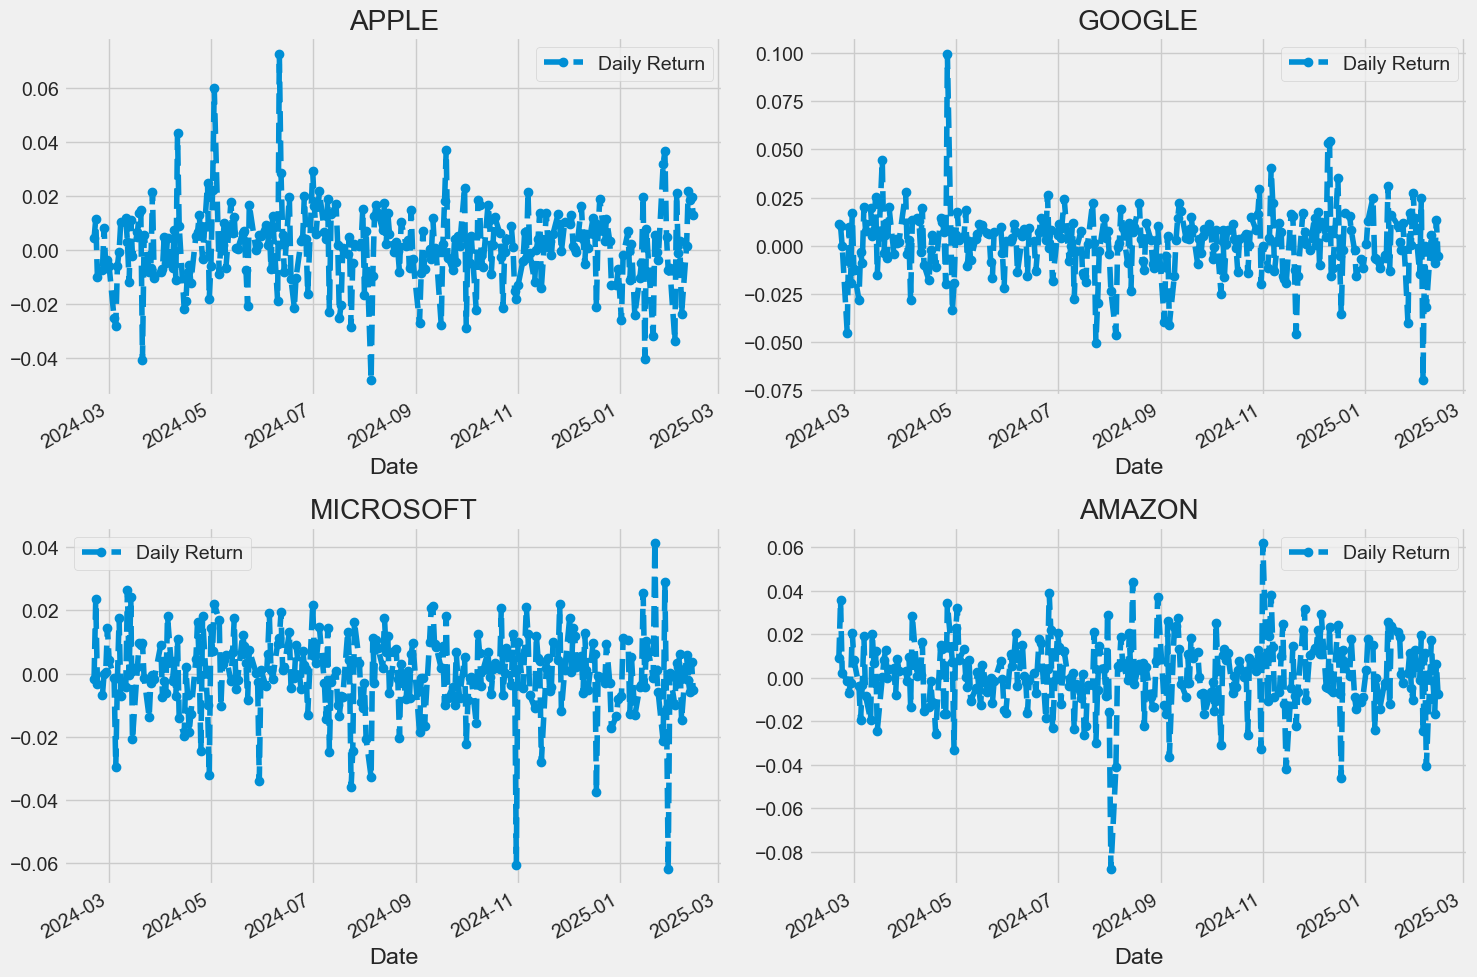

In [8]:
for company in company_data.values():
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_data['AAPL']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

company_data['GOOG']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

company_data['MSFT']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

company_data['AMZN']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

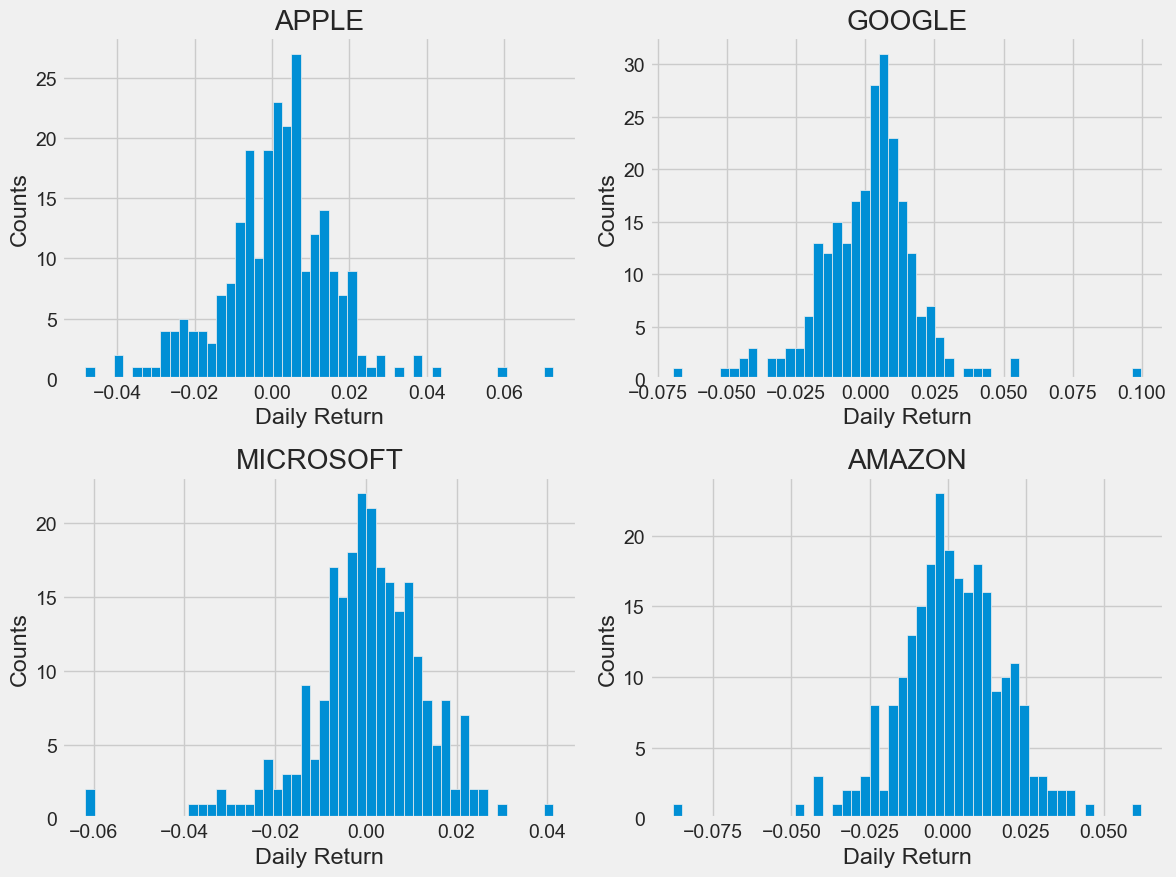

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_data.values(), 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[tech_list[i - 1]]}')
    
plt.tight_layout()

In [10]:
closing_df = yf.download(tech_list, start=start, end=end, group_by="ticker")
close_prices = closing_df.xs('Close', level=1, axis=1)
tech_rets = close_prices.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker          MSFT      AMZN      GOOG      AAPL
Date                                              
2024-02-20       NaN       NaN       NaN       NaN
2024-02-21 -0.001515  0.009038  0.011533  0.004186
2024-02-22  0.023547  0.035530  0.010289  0.011244
2024-02-23 -0.003182  0.002349 -0.000207 -0.010034
2024-02-26 -0.006824 -0.001486 -0.045013 -0.007451

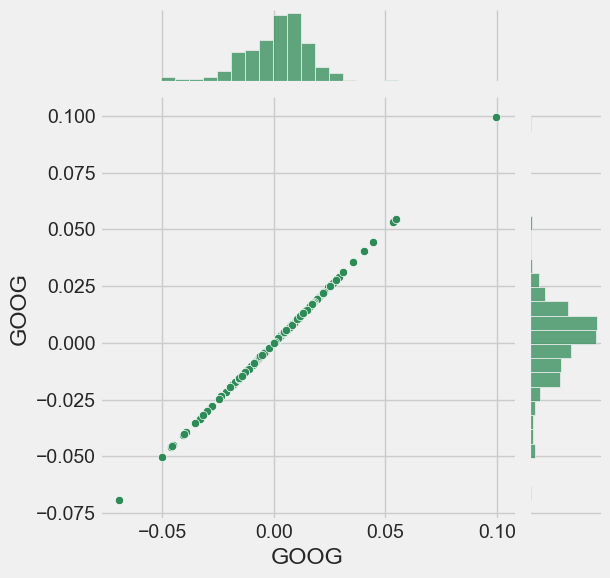

In [11]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

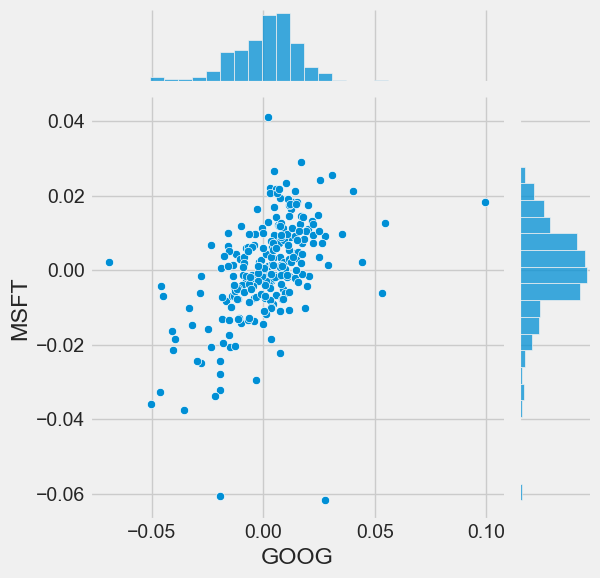

In [12]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

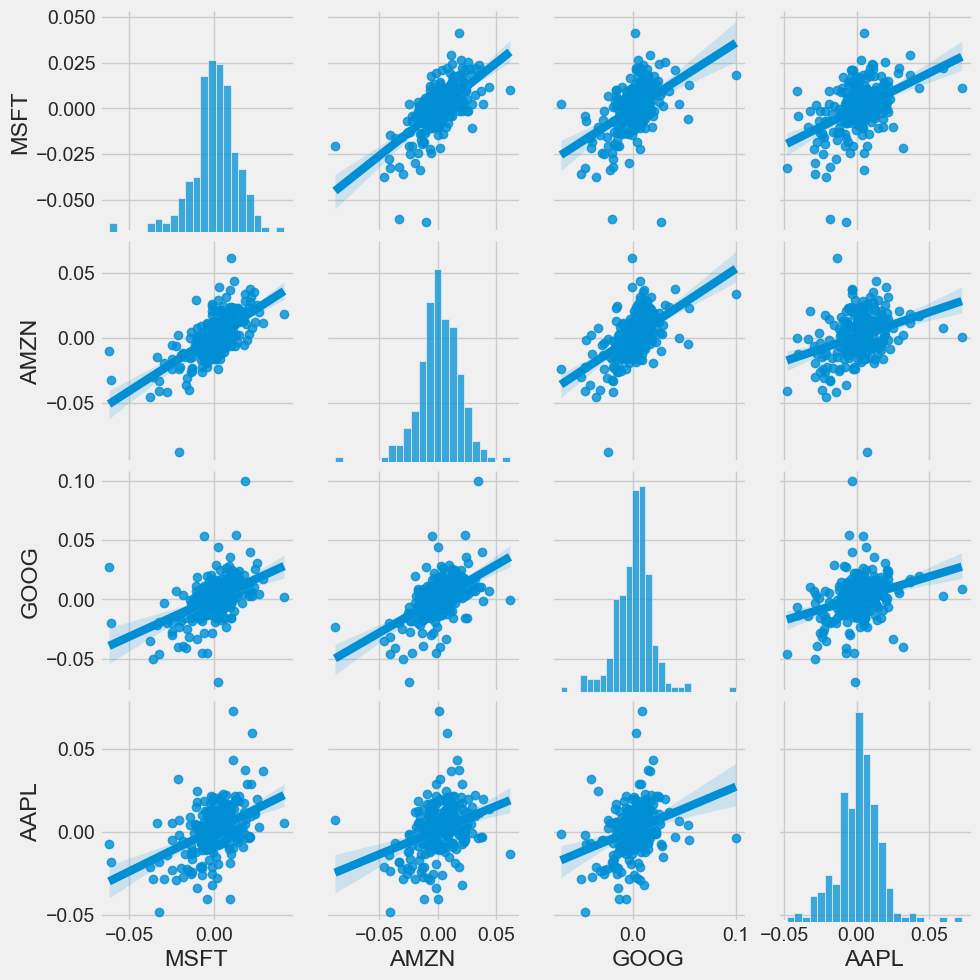

In [13]:
sns.pairplot(tech_rets, kind='reg')

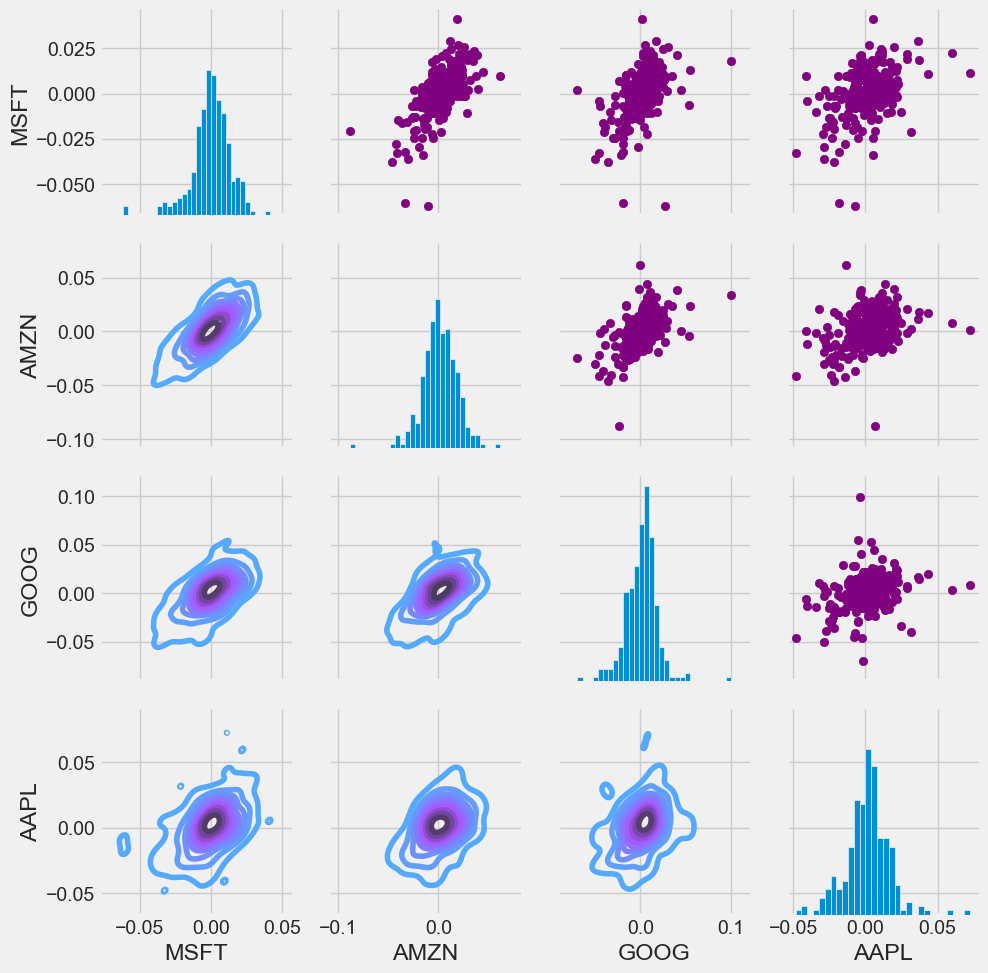

In [14]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

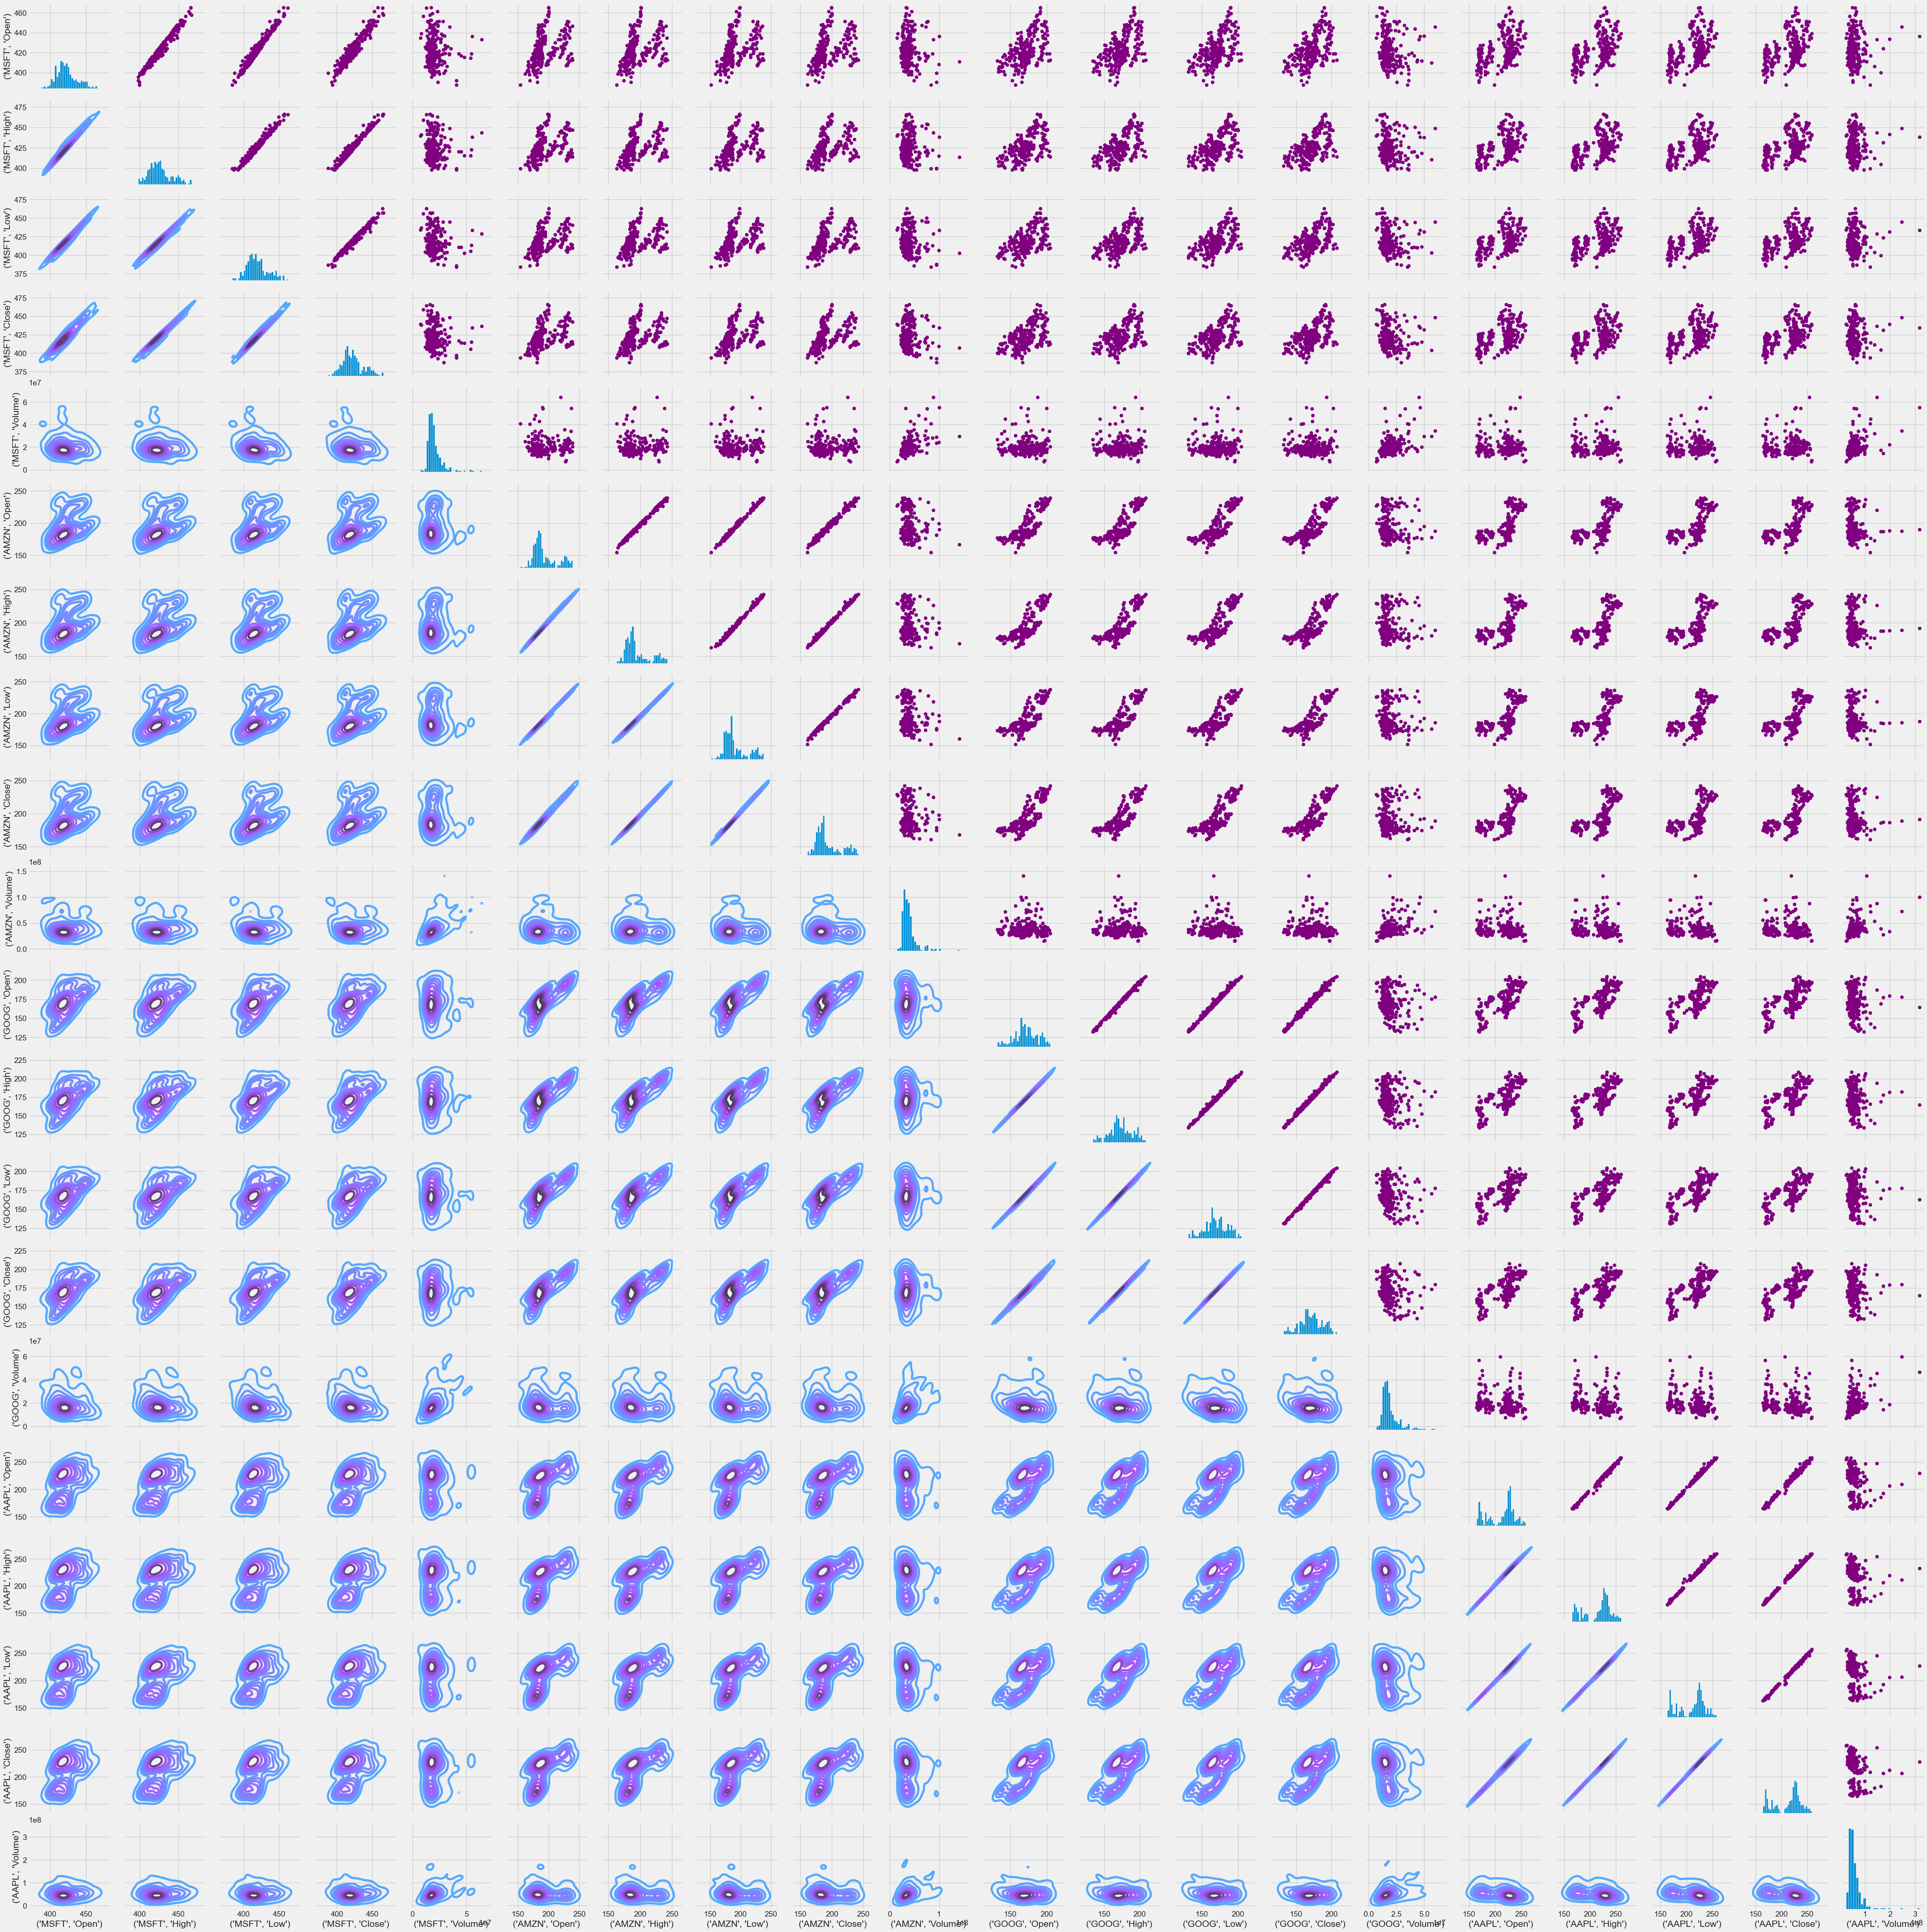

In [15]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

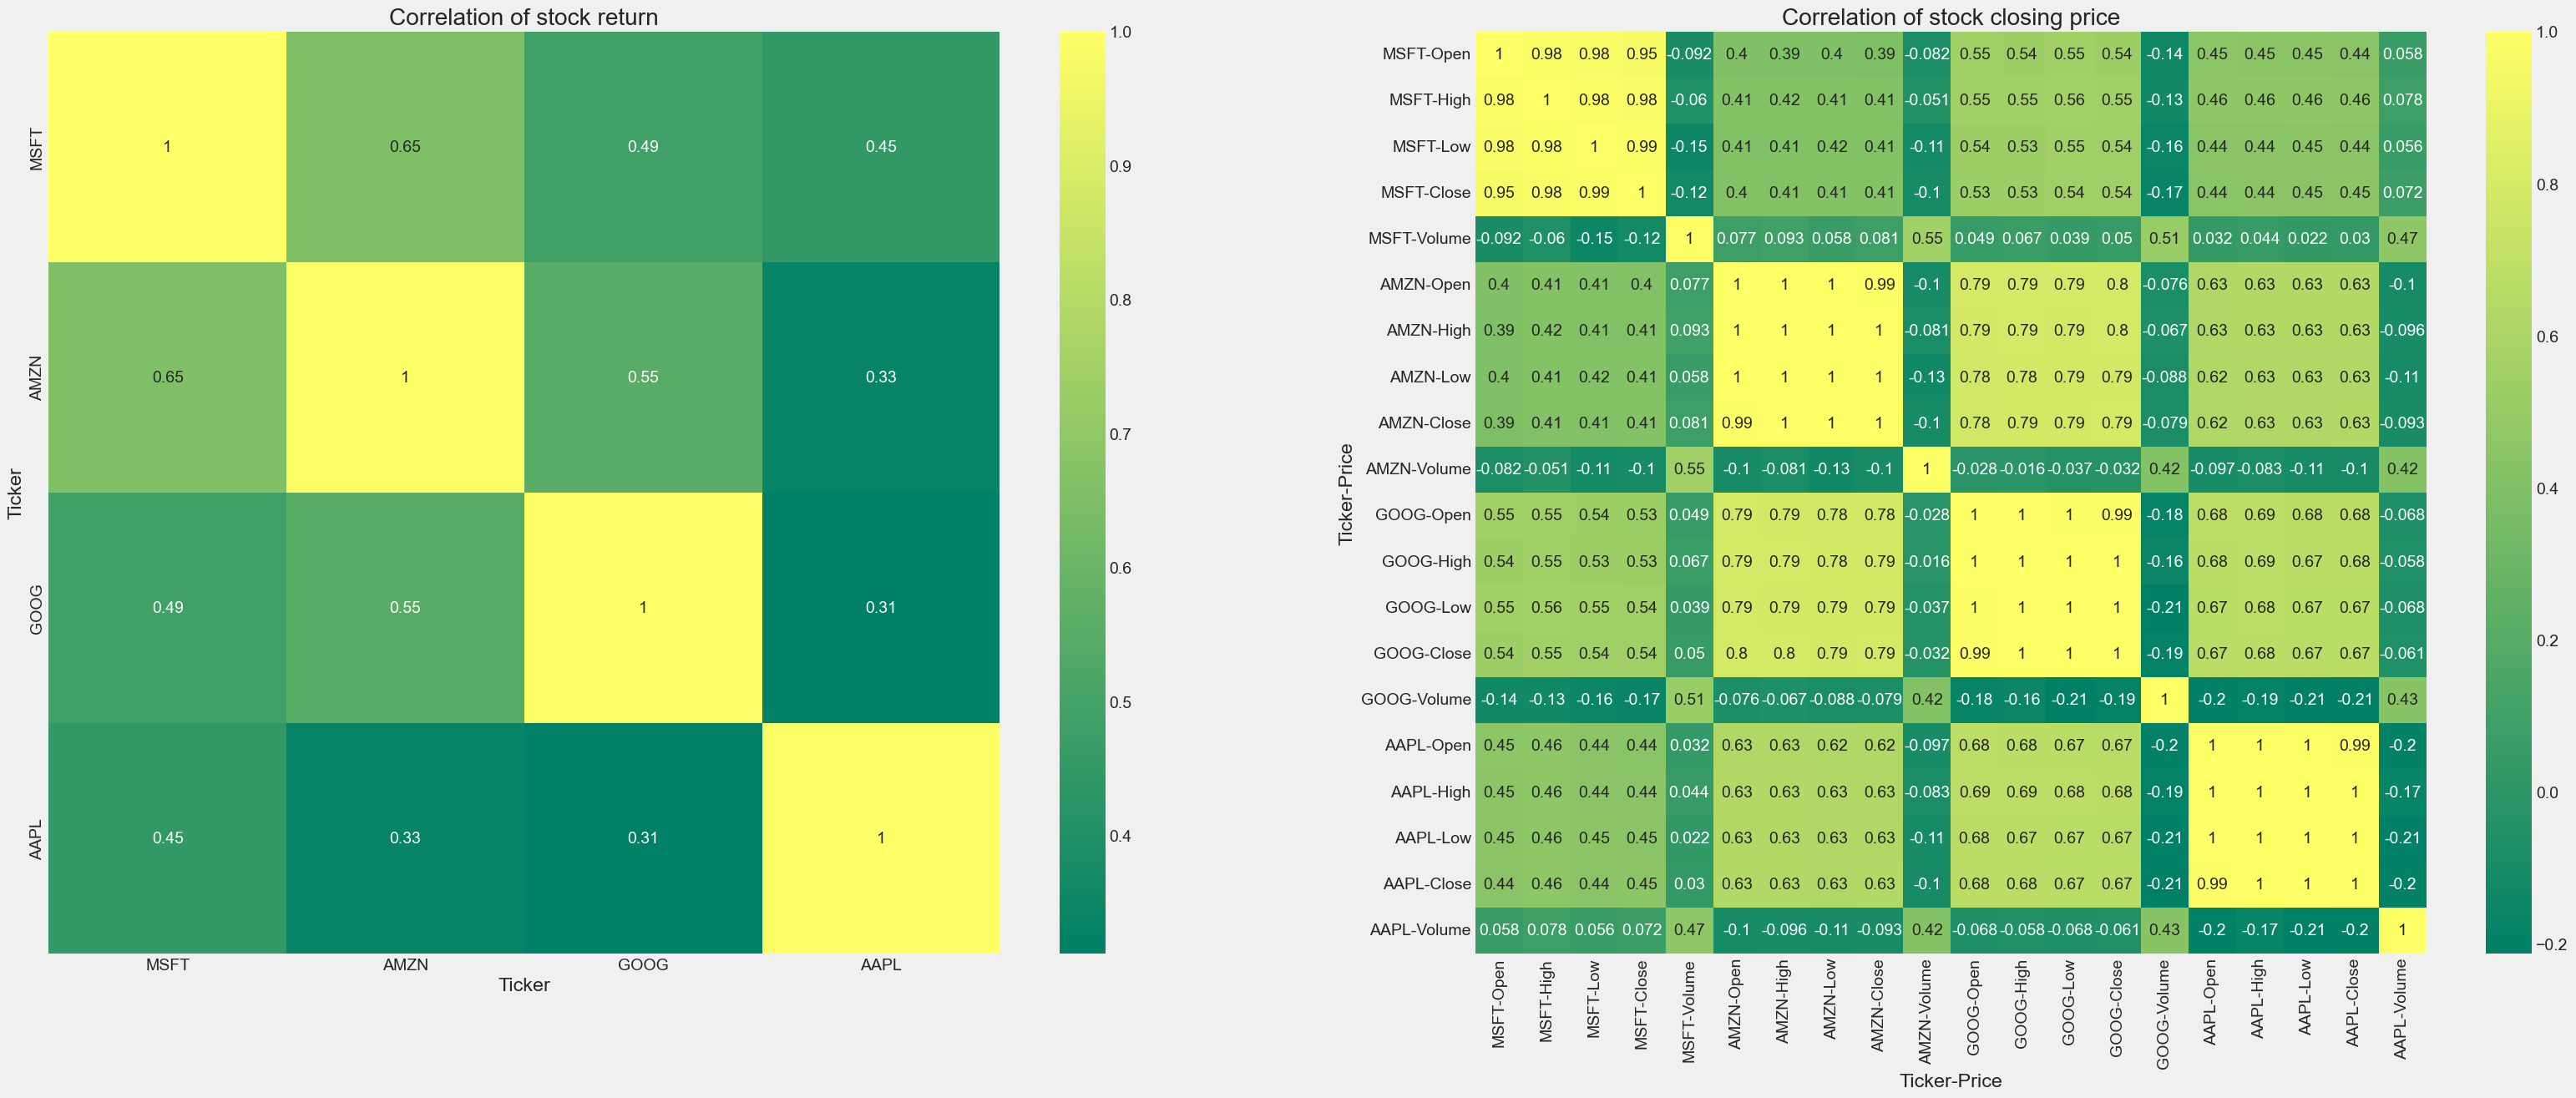

In [16]:
plt.figure(figsize=(36, 30))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

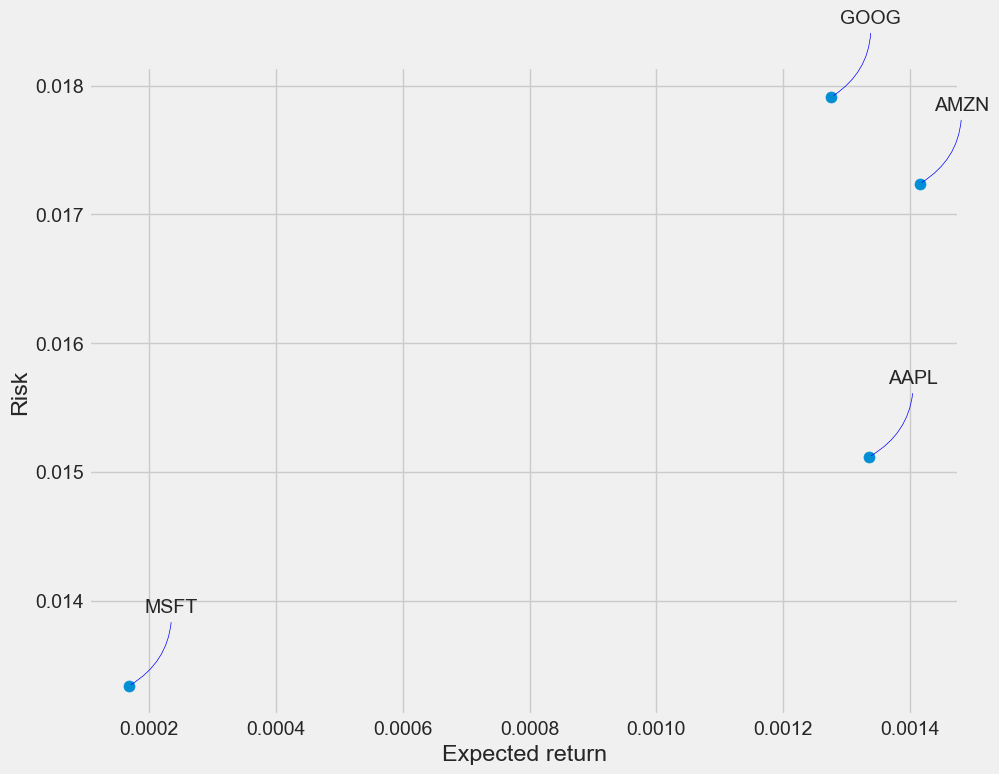

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2012-01-03   12.375389   12.413608   12.308281   12.320319  302220800
2012-01-04   12.441898   12.479215   12.316709   12.338376  260022000
2012-01-05   12.580029   12.595677   12.418726   12.487341  271269600
2012-01-06   12.711535   12.722068   12.615838   12.632389  318292800
2012-01-09   12.691377   12.872540   12.679941   12.804830  394024400
...                ...         ...         ...         ...        ...
2025-02-10  227.649994  230.589996  227.199997  229.570007   33115600
2025-02-11  232.619995  235.229996  228.130005  228.199997   53718400
2025-02-12  236.869995  236.960007  230.679993  231.199997   45243300
2025-02-13  241.529999  242.339996  235.570007  236.910004   53614100
2025-02-14  244.600006  245.550003  240.990005  241.250000   40838100

[3300 rows x 5 columns]

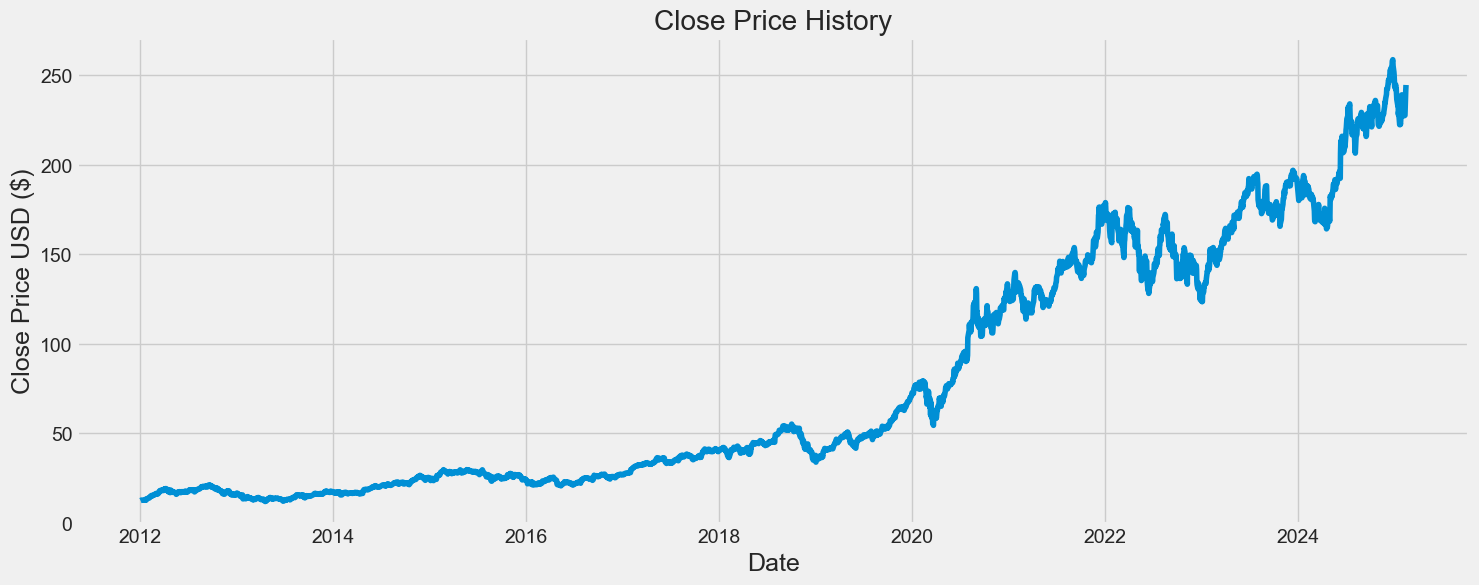

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [20]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3135

In [21]:
%pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

# Ensure 'df' contains the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

Note: you may need to restart the kernel to use updated packages.


array([[0.0018211 ],
       [0.00209058],
       [0.00265024],
       ...,
       [0.91140737],
       [0.93028834],
       [0.94272711]])

In [22]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

In [23]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0018211 , 0.00209058, 0.00265024, 0.00318307, 0.00310139,
       0.00328549, 0.00320135, 0.00305992, 0.00286727, 0.0034635 ,
       0.00400122, 0.0038354 , 0.00292701, 0.00379394, 0.00294043,
       0.0061411 , 0.00589358, 0.00621671, 0.00691537, 0.00733845,
       0.00730309, 0.00717263, 0.00772864, 0.0082517 , 0.00884431,
       0.00980145, 0.01181208, 0.01184257, 0.01296189, 0.01379836,
       0.01236077, 0.01291436, 0.01290336, 0.01445556, 0.01423486,
       0.01464332, 0.01537733, 0.0157858 , 0.01696243, 0.01781959,
       0.01806711, 0.01815368, 0.01668811, 0.01633448, 0.0163869 ,
       0.01776474, 0.01815245, 0.01898523, 0.02094832, 0.0235674 ,
       0.02307725, 0.02307846, 0.02497206, 0.02556464, 0.02514274,
       0.02475743, 0.0243563 , 0.02568899, 0.02660346, 0.02698634])]
[np.float64(0.02604015988447974)]

[array([0.0018211 , 0.00209058, 0.00265024, 0.00318307, 0.00310139,
       0.00328549, 0.00320135, 0.00305992, 0.00286727, 0.0034635 ,
       0.00400122, 0.00

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [25]:
%pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, LSTM

Note: you may need to restart the kernel to use updated packages.


In [26]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

e:\miniconda3\envs\StockMarketLSTM\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = data[training_data_len:, :]  # Ensure y_test contains the correct data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = y_test.reshape(-1, 1)  # Reshape y_test to match predictions
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


np.float64(204.67338477702145)

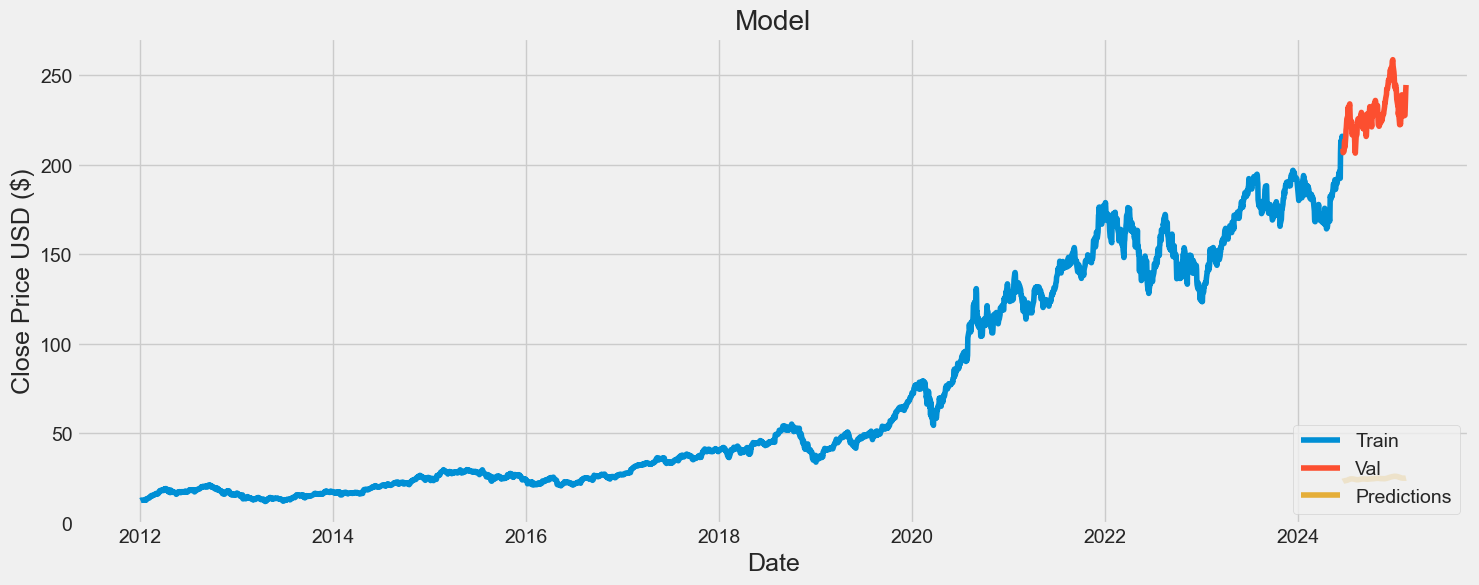

In [30]:
train = df[:training_data_len]
valid = df[training_data_len:].copy()
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
valid

Price            Close        High         Low        Open     Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL   
Date                                                                    
2024-06-20  208.977646  213.522384  208.150439  213.213410   86172500   
2024-06-21  206.794983  211.180238  206.416251  209.685263  246421400   
2024-06-24  207.442795  211.987518  205.897984  207.024203   80727000   
2024-06-25  208.369690  210.671950  207.911224  208.449409   56713900   
2024-06-26  212.535690  214.140298  209.934432  210.791552   66213200   
...                ...         ...         ...         ...        ...   
2025-02-10  227.649994  230.589996  227.199997  229.570007   33115600   
2025-02-11  232.619995  235.229996  228.130005  228.199997   53718400   
2025-02-12  236.869995  236.960007  230.679993  231.199997   45243300   
2025-02-13  241.529999  242.339996  235.570007  236.910004   53614100   
2025-02-14  244.600006  245.550003  240.990005  241.250000   40838100   

Price      Predictions  
Ticker                  
Date                    
2024-06-20   23.190502  
2024-06-21   23.271090  
2024-06-24   23.333908  
2024-06-25   23.387434  
2024-06-26   23.434547  
...                ...  
2025-02-10   24.936857  
2025-02-11   24.919195  
2025-02-12   24.916225  
2025-02-13   24.929735  
2025-02-14   24.963127  

[165 rows x 6 columns]